In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-dataset/bank.csv


In [11]:
import pandas as pd
df= pd.read_csv("/kaggle/input/bank-marketing-dataset/bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [14]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [18]:
df.select_dtypes(include = 'object' ).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [21]:

df = pd.get_dummies(df, drop_first=True)
df

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,59,2343,5,1042,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,True
1,56,45,5,1467,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,True
2,41,1270,5,1389,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,True
3,55,2476,5,579,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,True
4,54,184,5,673,2,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,True,False,False,...,False,False,False,False,False,False,False,False,True,False
11158,39,733,16,83,4,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,True,False
11159,32,29,19,156,2,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
11160,43,0,8,9,2,172,5,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [24]:

df.columns


Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'deposit_yes'],
      dtype='object')

In [26]:

df.rename(columns={'deposit_yes': 'y'}, inplace=True)


In [30]:
X= df.drop('y',axis = 1)
Y = df['y']

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test ,y_train,y_test= train_test_split(X,Y,test_size=0.25)


In [39]:
from sklearn.linear_model import LogisticRegression
lb= LogisticRegression()

lb.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
y_pred = lb.predict(x_test)

In [46]:

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7771408097456108


In [47]:
print("confusion_matrix",confusion_matrix(y_test, y_pred))

confusion_matrix [[1190  279]
 [ 343  979]]


In [48]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n       False       0.78      0.81      0.79      1469\n        True       0.78      0.74      0.76      1322\n\n    accuracy                           0.78      2791\n   macro avg       0.78      0.78      0.78      2791\nweighted avg       0.78      0.78      0.78      2791\n'

**THIS NOW DONE. LETS PERFORM HYPERPARAMETER TUNNING USING GRIDSEARCH CV**

In [50]:
from sklearn.model_selection import GridSearchCV()

In [53]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2', 'l1']
}


In [57]:
modal= LogisticRegression()

grid = GridSearchCV(modal, param_grid,cv= 5, scoring='accuracy')
grid.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2', 'l1'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [58]:
print("best_score: ",grid.best_score_)

best_score:  0.8309633196027033


In [59]:
print("best_parameter: ",grid.best_params_)

best_parameter:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [61]:
best_modal = grid.best_estimator_

In [63]:
y_pred_new= best_modal.predict(x_test)

In [66]:
print("previous accuressy :",accuracy_score(y_test, y_pred))
print("New accuressy :",accuracy_score(y_test, y_pred_new))
print("previous confusion_matrix",confusion_matrix(y_test, y_pred))
print(" Newconfusion_matrix",confusion_matrix(y_test, y_pred_new))

previous accuressy : 0.7771408097456108
New accuressy : 0.8086707273378717
previous confusion_matrix [[1190  279]
 [ 343  979]]
 Newconfusion_matrix [[1220  249]
 [ 285 1037]]


In [69]:
print("previous report",classification_report(y_test, y_pred))

previous report               precision    recall  f1-score   support

       False       0.78      0.81      0.79      1469
        True       0.78      0.74      0.76      1322

    accuracy                           0.78      2791
   macro avg       0.78      0.78      0.78      2791
weighted avg       0.78      0.78      0.78      2791



In [71]:
print("New report",classification_report(y_test, y_pred_new ))

New report               precision    recall  f1-score   support

       False       0.81      0.83      0.82      1469
        True       0.81      0.78      0.80      1322

    accuracy                           0.81      2791
   macro avg       0.81      0.81      0.81      2791
weighted avg       0.81      0.81      0.81      2791



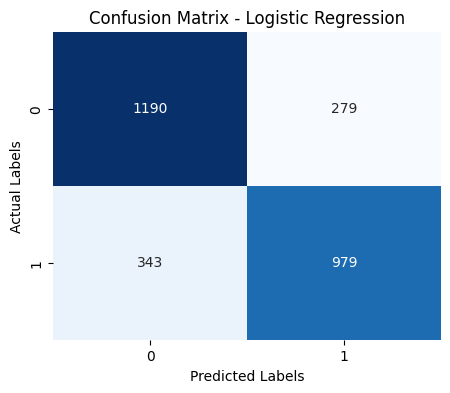

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
